### Objective: Explore "Australia Rain" dataset to study the weather of each regions in Australia. 
***

Dataset: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Below variables that influence the likelihood of raining:
- Pressure, Temperature, Humidity, and WindSpeed.

In [36]:
# Import libraries

import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')  # to create table

import hvplot.pandas    # to create interactive df
import pycountry_convert as pc
import pycountry
import datetime #to separate date

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from PIL import Image
import requests
from io import BytesIO


### A. Read dataset and examine columns

In [2]:
# read csv file

df = pd.read_csv('https://raw.githubusercontent.com/kimthuynh/Australia-Rain-Prediction/main/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### B. Data Processing

In [6]:
# Examine null rows
null_rows = df[df.isnull().any(axis=1)]
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89040 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           89040 non-null  object 
 1   Location       89040 non-null  object 
 2   MinTemp        87555 non-null  float64
 3   MaxTemp        87779 non-null  float64
 4   Rainfall       85779 non-null  float64
 5   Evaporation    26250 non-null  float64
 6   Sunshine       19205 non-null  float64
 7   WindGustDir    78714 non-null  object 
 8   WindGustSpeed  78777 non-null  float64
 9   WindDir9am     78474 non-null  object 
 10  WindDir3pm     84812 non-null  object 
 11  WindSpeed9am   87273 non-null  float64
 12  WindSpeed3pm   85978 non-null  float64
 13  Humidity9am    86386 non-null  float64
 14  Humidity3pm    84533 non-null  float64
 15  Pressure9am    73975 non-null  float64
 16  Pressure3pm    74012 non-null  float64
 17  Cloud9am       33152 non-null  float64
 18  Cloud

In [7]:
# remove null rows
df = df.dropna()
df.info()

#Findings: 56420 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [8]:
# Separate Date column to Year, Month, and Day
# Duplicate a column: df['DateCopy'] = df.loc[:, 'Date']

df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True)
df[['Year', 'Month', 'Day']] = df[['Year', 'Month', 'Day']].astype(int)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6


In [9]:
#Count Raintoday and RainTomorrow

if_raintoday = [(df['RainToday']=='Yes'), (df['RainToday']=='No')]
if_raintmr = [(df['RainTomorrow']=='Yes'), (df['RainTomorrow']=='No')]
values = [1,0]
df['RainToday_count'] = np.select(if_raintoday,values)
df['RainTomorrow_count'] = np.select(if_raintmr,values)
df[['RainToday_count','RainTomorrow_count']] = df[['RainToday_count','RainTomorrow_count']].astype(float)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,RainToday_count,RainTomorrow_count
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,5.0,26.6,33.4,No,No,2009,1,1,0.0,0.0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1.0,20.3,27.0,No,No,2009,1,2,0.0,0.0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,6.0,28.7,34.9,No,No,2009,1,4,0.0,0.0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,5.0,29.1,35.6,No,No,2009,1,5,0.0,0.0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,6.0,33.6,37.6,No,No,2009,1,6,0.0,0.0


In [10]:
#Group Rainfall
rainfall = [
        (df['Rainfall']<= 50),
        (df['Rainfall']> 50)| (df['Rainfall']<= 100),
        (df['Rainfall']> 100)| (df['Rainfall']<= 150),
        (df['Rainfall']> 150)| (df['Rainfall']<= 200),
        (df['Rainfall']> 200)]

rain_level = ['0-50','51-100','101-150','151-200','200+']
df['RainLevel'] = np.select(rainfall,rain_level)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,RainToday_count,RainTomorrow_count,RainLevel
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,26.6,33.4,No,No,2009,1,1,0.0,0.0,0-50
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,20.3,27.0,No,No,2009,1,2,0.0,0.0,0-50
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,28.7,34.9,No,No,2009,1,4,0.0,0.0,0-50
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,29.1,35.6,No,No,2009,1,5,0.0,0.0,0-50
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,33.6,37.6,No,No,2009,1,6,0.0,0.0,0-50


In [11]:
# Group cities to Regions

cities = [
        (df['Location']== 'Cobar') | (df['Location']== 'CoffsHarbour')| (df['Location']== 'Moree')| 
        (df['Location']== 'Sydney')|(df['Location']== 'SydneyAirport') | (df['Location']==  'WaggaWagga')|
        (df['Location']== 'Williamtown')|(df['Location']== 'Canberra') | (df['Location']== 'NorfolkIsland'),
        (df['Location']== 'Sale') |(df['Location']=='MelbourneAirport') |(df['Location']=='Melbourne')|
        (df['Location']== 'Mildura')|(df['Location']=='Portland')|(df['Location']=='Watsonia'),
        (df['Location']== 'Brisbane')|(df['Location']== 'Cairns')|(df['Location']=='Townsville'),
        (df['Location']== 'MountGambier')| (df['Location']== 'Nuriootpa')| (df['Location']== 'Woomera'),
        (df['Location']== 'PerthAirport')|(df['Location']== 'Perth'),
        (df['Location']== 'Hobart'),
        (df['Location']== 'AliceSprings')|(df['Location']== 'Darwin')]

regions = ['New South Wales', 'Victoria', 'Queensland', 'South Australia', 'West Australia','Tasmania', 'Northern Territory' ]
df['Region'] = np.select(cities,regions)
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,RainToday_count,RainTomorrow_count,RainLevel,Region
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,33.4,No,No,2009,1,1,0.0,0.0,0-50,New South Wales
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,27.0,No,No,2009,1,2,0.0,0.0,0-50,New South Wales
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,34.9,No,No,2009,1,4,0.0,0.0,0-50,New South Wales
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,35.6,No,No,2009,1,5,0.0,0.0,0-50,New South Wales
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,37.6,No,No,2009,1,6,0.0,0.0,0-50,New South Wales


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                56420 non-null  object 
 1   Location            56420 non-null  object 
 2   MinTemp             56420 non-null  float64
 3   MaxTemp             56420 non-null  float64
 4   Rainfall            56420 non-null  float64
 5   Evaporation         56420 non-null  float64
 6   Sunshine            56420 non-null  float64
 7   WindGustDir         56420 non-null  object 
 8   WindGustSpeed       56420 non-null  float64
 9   WindDir9am          56420 non-null  object 
 10  WindDir3pm          56420 non-null  object 
 11  WindSpeed9am        56420 non-null  float64
 12  WindSpeed3pm        56420 non-null  float64
 13  Humidity9am         56420 non-null  float64
 14  Humidity3pm         56420 non-null  float64
 15  Pressure9am         56420 non-null  float64
 16  

### C. Create Pipeline & Widget
#### C1. Make Pipeline 

In [13]:
# Make dataframe pipeline interactive
idf = df.interactive()


In [14]:
df[['RainTomorrow_count']].max()

RainTomorrow_count    1.0
dtype: float64

#### C2. Create Widget for the Dashboard

In [15]:
#Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=2008, end=2017, step = 1, value =2016)
year_slider

IntSlider(end=2017, name='Year slider', start=2008, value=2016)

### D. Build Visualization
#### D1. Line chart - Weather Observations by Regions

In [16]:
# Create Radio button
yaxis_rain = pn.widgets.RadioButtonGroup(
    name='Y-axis',
    options = ['Rainfall','Evaporation','Sunshine',],
    button_type='success'
)

In [17]:
# define pipeline
regions = ['New South Wales', 'Victoria', 'Queensland', 'South Australia', 'West Australia','Tasmania', 'Northern Territory' ]

rain_pipeline = (
    idf[
        (idf.Year <=year_slider) &   #use <= to link data this and next year
        (idf.Region.isin(regions))
    ]
    .groupby(['Year','Region'])[yaxis_rain].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')
    .reset_index(drop=True)
)

In [18]:
#show table
#rain_pipeline

In [19]:
#Viz 1: Connect Pipeline and visualization

rain_plot = rain_pipeline.hvplot(x='Year', by='Region',y=yaxis_rain, line_width=2, 
                                 title ="Weather Observations by Regions",height=300,width=800)

rain_plot

##### Findings
- Queensland had the most rainfall on 2010
- Northen Territory had the most evaporation compared to other regions
- Nothern Territory and West Australia had lots of sunshine

#### D2. Heatmap - Weather Observation by Months & Regions

In [20]:
#viz 2: scatter plot for

# connect data pineline

rain_heatmap_pipeline = (
    idf[
        (idf.Year ==year_slider) &
        (idf.Region.isin(regions))
         ]
    .groupby(['Year','Month','Region'])[yaxis_rain].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')
    .reset_index(drop=True)
)

In [21]:
#rain_heatmap_pipeline

In [22]:
rain_heatmap_plot=rain_heatmap_pipeline.hvplot(x='Month',y='Region',C=yaxis_rain,by='Region',kind='heatmap',
                                               title='Observations by Months and Regions',reduce_function=np.mean,
                                               colorbar=True, legend=True, height=300,width=500)
rain_heatmap_plot

#### D3. Bar chart - Rain Frequency by Regions

In [23]:
#Viz 3: Bar chart 

# connect data pineline
region = ['New South Wales', 'Victoria', 'Queensland', 'South Australia', 'West Australia','Tasmania', 'Northern Territory' ]

raincount_pipeline = (
    idf[
        (idf.Year ==year_slider) &  #use == to show data for exact year
        (idf.Region.isin(region))
    ]
    .groupby(['Year','Region'])[yaxis_rain].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')
    .reset_index(drop=True)
)

In [24]:
# raincount_pipeline

In [25]:
raincount_bar_plot=raincount_pipeline.hvplot(kind='bar',y=yaxis_rain,x='Region',title="Rain Frequency by Regions",
                                             width=500, height=300)
raincount_bar_plot

In [26]:
#Viz 4: Table format for RainToday & RainTomorrow
raincount_table = raincount_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 7, width=420)
raincount_table

In [27]:
# Viz test: couldn't connect to interact with Year
columns = ['WindSpeed9am', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Temp9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 
           'Cloud3pm', 'Temp3pm']

x_axis = pn.widgets.Select(name='x_axis',options = columns, value='Humidity9am')
y_axis = pn.widgets.Select(name='y_axis',options = columns, value='Pressure9am')

para_plot = pn.Row(pn.Column('## Parameters', x_axis,y_axis),
       pn.bind(df.hvplot.scatter, x_axis, y_axis, by='RainToday'))

para_plot

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='x_axis', options=['WindSpeed9am', ...], value='Humidity9am')
        [2] Select(name='y_axis', options=['WindSpeed9am', ...], value='Pressure9am')
    [1] ParamFunction(function)

#### D4. Scatter Plot - Compared by Pressure & Temperature

In [28]:
#Viz 5
rain_status = ['Yes', 'No']

pressure_scatter_pipeline = (
    idf[
        (idf.Year ==year_slider) &
        (idf.RainToday.isin(rain_status))
    ]
    .groupby(['Year','Temp9am','RainToday'])['Pressure9am'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')
    .reset_index(drop=True)
)


In [29]:
pressure_scatter_plot=pressure_scatter_pipeline.hvplot(x='Temp9am',y='Pressure9am',by='RainToday', size=50,kind='scatter',
                                               title='Rain Status compared by Pressure & Temperature',
                                               alpha=0.7, legend=False, height=320,width=450)
pressure_scatter_plot

#### D5. Scatter Plot - Compared by Humidity & WindSpeed

In [30]:
#Viz 6

humid_scatter_pipeline = (
    idf[
        (idf.Year ==year_slider) &
        (idf.RainToday.isin(rain_status))
    ]
    .groupby(['Year','Humidity9am','RainToday'])['WindSpeed9am'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')
    .reset_index(drop=True)
)


In [31]:
humid_scatter_plot=humid_scatter_pipeline.hvplot(x='WindSpeed9am',y='Humidity9am',by='RainToday',size=50,kind='scatter',
                                               title='Rain Status compared by Humidity & WindSpeed',
                                               alpha=0.7,legend=True,height=320,width=550)
humid_scatter_plot

### E. Build Dashboard

In [32]:
#Dashboard Layout

template = pn.template.FastListTemplate(
    title='Australia Rain 2008-2017 Dashboard',
    sidebar=[pn.pane.Markdown("## Australia Rainfall"),
             pn.pane.Markdown("##### This dashboard explored the rain frequency and possible variables that influence rainfall at Australia (2008-2017). "),
            pn.pane.Markdown(""),
             pn.pane.Markdown("##### 1. Please move year_slider to select specific year"),year_slider,
             pn.pane.Markdown(""),
             pn.pane.Markdown("##### 2. Please select below parameters for Weather Observations & Rain Frequency Charts"),
             yaxis_rain,
             pn.pane.Markdown(""),
            pn.pane.Markdown("##### Note: Click the three line icon on top left corner to hide/show sidebar")],
             
    main=[pn.Row(pn.Column(pressure_scatter_plot.panel(sizing_mode='scale_both'),height=320, width=450,margin=(0,5,0,10)),   #viz3
                        pn.Column(humid_scatter_plot.panel(sizing_mode='scale_both'),height=320, width=550,margin=(0,5,0,10))),     #viz6
                 pn.Row(pn.Column(rain_plot.panel(width=800),margin=(0,5,5,10))),           #viz 1 linechart margin [top, right, bottom, left]
                 pn.Row(pn.Column(raincount_bar_plot.panel(sizing_mode='scale_both'),height=300,width=500, margin=(0,5,0,10)), #viz 3 bar
                        pn.Column(rain_heatmap_plot.panel(sizing_mode='scale_both'),height=300,width=500,margin=(0,5,0,10)))   #viz 2 heatmap
                       # pn.Column(raincount_table.panel(sizing_mode='scale_both'),height=280,width=420,margin=(25,5,5,10))),
          # pn.Row(para_plot)
                       ],
    accent_base_color="#40ABF0",
    header_background="#40ABF0",
    
)
# template.show()
template.servable();


### F. View Dashboard

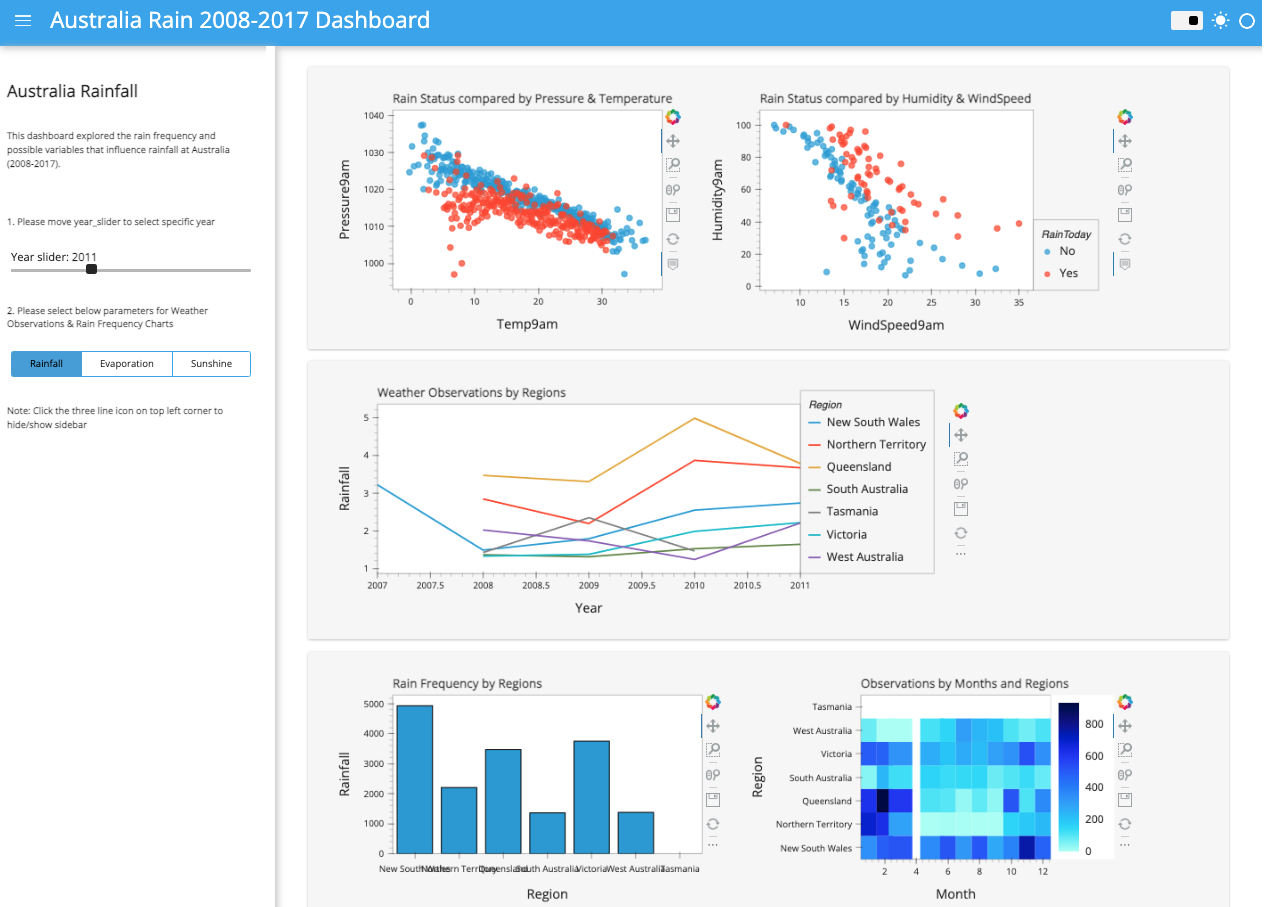

In [38]:
#Dashboard finished:
# On terminal: enter: panel serve Australia_rain.ipynb
# copy the url and paste on browser to view dashboard like below

url = 'https://raw.githubusercontent.com/kimthuynh/Australia-Rain-Prediction/main/Australia_rain%20dashboard.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))


img